In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from surprise import KNNBasic, SVD, Reader, accuracy, Dataset
from surprise.model_selection import cross_validate, train_test_split
%matplotlib inline

In [3]:
ratings = pd.read_csv('ratings_small.csv')
ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [7]:
reader = Reader()
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [8]:
pmf = SVD(biased = False)
crosvali_pmf = cross_validate(pmf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0138  1.0087  1.0088  1.0088  1.0052  1.0091  0.0027  
MAE (testset)     0.7808  0.7810  0.7781  0.7804  0.7759  0.7793  0.0020  
Fit time          0.36    0.36    0.38    0.38    0.37    0.37    0.01    
Test time         0.06    0.14    0.06    0.06    0.06    0.07    0.03    


In [9]:
print('Average MAE for PMF Collaborative Filtering: ', crosvali_pmf['test_mae'].mean())
print('Average RMSE for PMF Collaborative Filtering: ', crosvali_pmf['test_rmse'].mean())

Average MAE for PMF Collaborative Filtering:  0.7792595519990089
Average RMSE for PMF Collaborative Filtering:  1.0090660004385517


In [10]:
sim_options = {'user_based': True}
user_based_cf = KNNBasic(sim_options=sim_options)
crosvali_ub = cross_validate(user_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9710  0.9740  0.9658  0.9678  0.9593  0.9676  0.0050  
MAE (testset)     0.7421  0.7485  0.7458  0.7422  0.7390  0.7435  0.0033  
Fit time          0.03    0.04    0.04    0.04    0.04    0.04    0.00    
Test time         0.73    0.78    0.72    0.78    0.71    0.74    0.03    


In [11]:
print('Average MAE for User-based Collaborative Filtering: ', crosvali_ub['test_mae'].mean())
print('Average RMSE for User-based Collaborative Filtering: ', crosvali_ub['test_rmse'].mean())

Average MAE for User-based Collaborative Filtering:  0.7435314644912953
Average RMSE for User-based Collaborative Filtering:  0.9675833099184151


In [14]:
sim_options = {'user_based': False}
item_based_cf = KNNBasic(sim_options=sim_options)
crosvali_ib = cross_validate(item_based_cf, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9368  0.9376  0.9335  0.9376  0.9296  0.9350  0.0031  
MAE (testset)     0.7219  0.7214  0.7198  0.7248  0.7204  0.7217  0.0017  
Fit time          1.46    1.46    1.51    1.49    1.48    1.48    0.02    
Test time         3.12    3.16    3.10    3.19    3.10    3.14    0.04    


In [15]:
print('Average MAE for Item-based Collaborative Filtering: ', crosvali_ib['test_mae'].mean())
print('Average RMSE for Item-based Collaborative Filtering: ', crosvali_ib['test_rmse'].mean())

Average MAE for Item-based Collaborative Filtering:  0.7216627794967815
Average RMSE for Item-based Collaborative Filtering:  0.9350170922160492


In [16]:
sim_options = {'name':'cosine', 'user_based': True}
ub_cosine = KNNBasic(sim_options=sim_options);
crosvali_ub_cosine = cross_validate(ub_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9926  0.9928  0.9961  0.9997  0.9914  0.9945  0.0030  
MAE (testset)     0.7685  0.7679  0.7701  0.7703  0.7660  0.7686  0.0016  
Fit time          0.05    0.06    0.06    0.06    0.06    0.06    0.00    
Test time         0.72    0.72    0.73    0.78    0.73    0.74    0.02    


In [17]:
sim_options = {'name':'msd', 'user_based': True}
ub_msd = KNNBasic(sim_options=sim_options);
crosvali_ub_msd = cross_validate(ub_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9654  0.9678  0.9664  0.9672  0.9734  0.9680  0.0028  
MAE (testset)     0.7429  0.7411  0.7449  0.7442  0.7462  0.7439  0.0018  
Fit time          0.03    0.04    0.04    0.04    0.04    0.04    0.00    
Test time         0.69    0.71    0.71    0.78    0.73    0.73    0.03    


In [18]:
sim_options = {'name':'pearson', 'user_based': True}
ub_pearson = KNNBasic(sim_options=sim_options);
crosvali_ub_pearson = cross_validate(ub_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0000  1.0055  0.9922  0.9934  1.0033  0.9989  0.0053  
MAE (testset)     0.7743  0.7771  0.7682  0.7682  0.7776  0.7731  0.0041  
Fit time          0.07    0.08    0.08    0.07    0.09    0.08    0.01    
Test time         0.70    0.80    0.71    0.74    0.83    0.76    0.05    


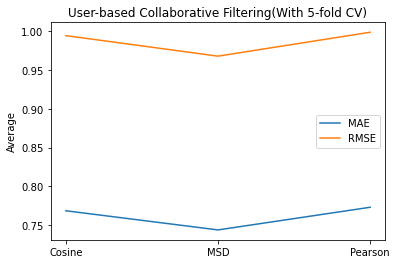

In [47]:
x = [0,1,2]
y_mae = [crosvali_ub_cosine['test_mae'].mean(),crosvali_ub_msd['test_mae'].mean(),crosvali_ub_pearson['test_mae'].mean()]
y_rmse = [crosvali_ub_cosine['test_rmse'].mean(),crosvali_ub_msd['test_rmse'].mean(),crosvali_ub_pearson['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.plot(x, y_rmse)
plt.title('User-based Collaborative Filtering(With 5-fold CV)')
plt.legend(['MAE','RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.ylabel('Average')
plt.show()

In [29]:
sim_options = {'name':'cosine', 'user_based': False}
ib_cosine = KNNBasic(sim_options=sim_options);
crosvali_ib_cosine = cross_validate(ib_cosine, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0009  0.9994  0.9940  0.9905  0.9927  0.9955  0.0040  
MAE (testset)     0.7782  0.7775  0.7742  0.7714  0.7751  0.7753  0.0024  
Fit time          3.12    2.94    2.90    2.81    2.80    2.91    0.12    
Test time         3.11    3.22    3.11    3.10    3.25    3.16    0.06    


In [24]:
sim_options = {'name':'msd', 'user_based': False}
ib_msd = KNNBasic(sim_options=sim_options);
crosvali_ib_msd = cross_validate(ib_msd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9353  0.9337  0.9432  0.9365  0.9274  0.9352  0.0051  
MAE (testset)     0.7188  0.7215  0.7245  0.7233  0.7167  0.7209  0.0029  
Fit time          1.49    1.41    1.47    1.52    1.45    1.47    0.04    
Test time         3.12    3.12    3.28    3.14    3.10    3.15    0.07    


In [25]:
sim_options = {'name':'pearson', 'user_based': False}
ib_pearson = KNNBasic(sim_options=sim_options);
crosvali_ib_pearson = cross_validate(ib_pearson, data, measures=['RMSE', 'MAE'], cv=5, verbose=True);

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9848  0.9830  0.9905  0.9937  0.9931  0.9890  0.0044  
MAE (testset)     0.7646  0.7657  0.7688  0.7704  0.7709  0.7681  0.0025  
Fit time          5.29    5.01    4.88    4.89    4.85    4.98    0.16    
Test time         3.23    3.04    3.07    3.25    3.05    3.13    0.09    


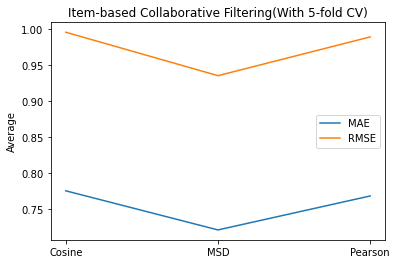

In [30]:
x = [0,1,2]
y_mae = [crosvali_ib_cosine['test_mae'].mean(),crosvali_ib_msd['test_mae'].mean(),crosvali_ib_pearson['test_mae'].mean()]
y_rmse = [crosvali_ib_cosine['test_rmse'].mean(),crosvali_ib_msd['test_rmse'].mean(),crosvali_ib_pearson['test_rmse'].mean()]
plt.plot(x, y_mae)
plt.plot(x, y_rmse)
plt.title('Item-based Collaborative Filtering(With 5-fold CV)')
plt.legend(['MAE','RMSE'])
plt.xticks(x,['Cosine','MSD','Pearson'])
plt.ylabel('Average')
plt.show()

In [31]:
trainset, testset = train_test_split(data, test_size = 0.25, random_state = 42)

In [48]:
ubc_nn_mae = []
ubc_nn_rmse = []
k1 = list(np.arange(1,50,2))
for i in k1:
  ubc_nn = KNNBasic(k = i, sim_options = {'user_based' : True})
  ubc_nn.fit(trainset)
  predictions = ubc_nn.test(testset)
  ubc_nn_mae.append(accuracy.mae(predictions))
  ubc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9063
RMSE: 1.2110
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7878
RMSE: 1.0270
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7612
RMSE: 0.9913
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7494
RMSE: 0.9772
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7451
RMSE: 0.9721
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7426
RMSE: 0.9684
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7415
RMSE: 0.9665
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7420
RMSE: 0.9664
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7426
RMSE: 0.9666
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7428
RMSE: 0.9665
Computing 

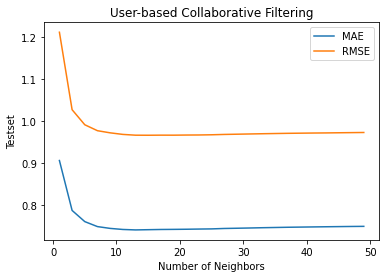

In [49]:
plt.plot(k1,ubc_nn_mae)
plt.plot(k1,ubc_nn_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset')
plt.legend(['MAE','RMSE'])
plt.title('User-based Collaborative Filtering')
plt.show()

In [50]:
k_ubc = ubc_nn_rmse.index(min(ubc_nn_rmse))+1
print('Best Value of K : ', k_ubc)
print('Minimum RMSE : ', min(ubc_nn_rmse))

Best Value of K :  8
Minimum RMSE :  0.9663589276453397


In [51]:
ibc_nn_mae = []
ibc_nn_rmse = []
for i in k1:
  ibc_nn = KNNBasic(k = i, sim_options = {'user_based' : False})
  ibc_nn.fit(trainset)
  predictions = ibc_nn.test(testset)
  ibc_nn_mae.append(accuracy.mae(predictions))
  ibc_nn_rmse.append(accuracy.rmse(predictions))

Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.9703
RMSE: 1.3138
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.8337
RMSE: 1.0839
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7966
RMSE: 1.0277
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7765
RMSE: 1.0013
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7659
RMSE: 0.9867
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7581
RMSE: 0.9768
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7515
RMSE: 0.9687
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7474
RMSE: 0.9639
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7445
RMSE: 0.9602
Computing the msd similarity matrix...
Done computing similarity matrix.
MAE:  0.7419
RMSE: 0.9569
Computing 

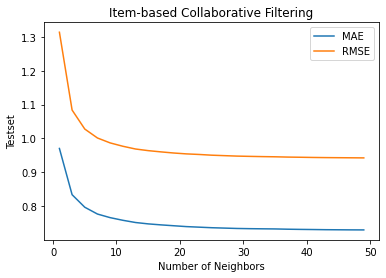

In [52]:
plt.plot(k1,ibc_nn_mae)
plt.plot(k1,ibc_nn_rmse)
plt.xlabel('Number of Neighbors')
plt.ylabel('Testset')
plt.legend(['MAE','RMSE'])
plt.title('Item-based Collaborative Filtering')
plt.show()

In [53]:
k_ibc = ibc_nn_rmse.index(min(ibc_nn_rmse))+1
print('Best Value of K : ', k_ibc)
print('Minimum RMSE : ', min(ibc_nn_rmse))

Best Value of K :  25
Minimum RMSE :  0.942461002786997
